# Communication Exp. Lab2 source code

## B09901142 EE3 呂睿超

### Question 1.a

In [2]:
#import needed module
import qiskit
from qiskit import *
import math
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector,plot_bloch_multivector

In [4]:
#set seed
seed_noise = np.random.randint(1000)
print(seed_noise)
np.random.seed(seed = 911029+seed_noise)
#bit_length
n = 4

#alice
alice_bits = np.random.randint(2,size = n)
print(alice_bits)

240
[1 1 1 1]


In [7]:
channel_1.clear()

In [8]:
#channel_1
channel_1 = QuantumCircuit(2,1)
channel_1.h(1)
channel_1.cnot(1,0)
channel_1.draw()

┌───┐
q_0: ─────┤ X ├
     ┌───┐└─┬─┘
q_1: ┤ H ├──■──
     └───┘     
c: 1/══════════

In [9]:
b2 = alice_bits[-2]
b1 = alice_bits[-1]
if(b2 == 1):
    channel_1.z(0)
if(b1 == 1):
    channel_1.x(0)
channel_1.i(0)
channel_1.draw()

┌───┐┌───┐┌───┐┌───┐
q_0: ─────┤ X ├┤ Z ├┤ X ├┤ I ├
     ┌───┐└─┬─┘└───┘└───┘└───┘
q_1: ┤ H ├──■─────────────────
     └───┘                    
c: 1/═════════════════════════

In [10]:
channel_1.cnot(0,1)
channel_1.h(0)
channel_1.i(1)
channel_1.measure(0,0)
#channel_1.measure(1,0)


channel_1.draw()

┌───┐┌───┐┌───┐┌───┐     ┌───┐┌─┐
q_0: ─────┤ X ├┤ Z ├┤ X ├┤ I ├──■──┤ H ├┤M├
     ┌───┐└─┬─┘└───┘└───┘└───┘┌─┴─┐├───┤└╥┘
q_1: ┤ H ├──■─────────────────┤ X ├┤ I ├─╫─
     └───┘                    └───┘└───┘ ║ 
c: 1/════════════════════════════════════╩═
                                         0

In [11]:
#measure b1
simulator = Aer.get_backend('qasm_simulator')
job = execute(channel_1, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 1024}


In [12]:
#measure b2
channel_1.measure(1,0)
simulator = Aer.get_backend('qasm_simulator')
job = execute(channel_1, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 1024}


In [72]:
channel_2.clear()

In [13]:
channel_2 = QuantumCircuit(2,1)
channel_2.h(1)
channel_2.cnot(1,0)
b4 = alice_bits[-4]
b3 = alice_bits[-3]
if(b4 == 1):
    channel_2.z(0)
if(b3 == 1):
    channel_2.x(0)
channel_2.i(0)

channel_2.cnot(0,1)
channel_2.h(0)
channel_2.i(1)
channel_2.measure(0,0)
#channel_2.measure(1,1)


channel_2.draw()

┌───┐┌───┐┌───┐┌───┐     ┌───┐┌─┐
q_0: ─────┤ X ├┤ Z ├┤ X ├┤ I ├──■──┤ H ├┤M├
     ┌───┐└─┬─┘└───┘└───┘└───┘┌─┴─┐├───┤└╥┘
q_1: ┤ H ├──■─────────────────┤ X ├┤ I ├─╫─
     └───┘                    └───┘└───┘ ║ 
c: 1/════════════════════════════════════╩═
                                         0

In [14]:
#measure b4
simulator = Aer.get_backend('qasm_simulator')
job2 = execute(channel_2, simulator, shots = 1024)
result = job2.result()
counts = result.get_counts()
print(counts)

{'1': 1024}


In [17]:
#measure b3
channel_2.measure(1,0)
simulator = Aer.get_backend('qasm_simulator')
job2 = execute(channel_2, simulator, shots = 1024)
result = job2.result()
counts = result.get_counts()
print(counts)
for key, value in counts.items():
    print(type(key))

{'1': 1024}
<class 'str'>


In [24]:
#function 
def Superdense_Coding(tries):
    #initialize error variable
    SER = 0
    BER = 0
    for i in range(tries):
        #initialize channel_1
        channel_1 = QuantumCircuit(2,1)
        channel_1.h(1)
        channel_1.cnot(1,0)
        #initialize channel_2
        channel_2 = QuantumCircuit(2,1)
        channel_2.h(1)
        channel_2.cnot(1,0)
        #generate random classical bit-string
        seed_noise = np.random.randint(1000)
        np.random.seed(seed = 911029+seed_noise)
        #bit_length
        n = 4
        #alice
        alice_bits = np.random.randint(2,size = n)
        #print(alice_bits)
        b4 = alice_bits[-4]
        b3 = alice_bits[-3]
        b2 = alice_bits[-2]
        b1 = alice_bits[-1]
        
        if(b4 == 1):
            channel_2.z(0)
        if(b3 == 1):
            channel_2.x(0)
        channel_2.i(0)
        
        if(b2 == 1):
            channel_1.z(0)
        if(b1 == 1):
            channel_1.x(0)
        channel_1.i(0)
        
        channel_2.cnot(0,1)
        channel_2.h(0)
        channel_2.i(1)
        
        channel_1.cnot(0,1)
        channel_1.h(0)
        channel_1.i(1)
        #measure b4
        channel_2.measure(0,0)
        simulator = Aer.get_backend('qasm_simulator')
        job2 = execute(channel_2, simulator, shots = 1)
        result = job2.result()
        counts = result.get_counts()
        for key, value in counts.items():
            bob_b4 = key
        #measure b3
        channel_2.measure(1,0)
        simulator = Aer.get_backend('qasm_simulator')
        job2 = execute(channel_2, simulator, shots = 1)
        result = job2.result()
        counts = result.get_counts()
        for key, value in counts.items():
            bob_b3 = key
        
        if(bob_b4 == b4):BER+=1
        if(bob_b3 == b3):BER+=1
        if(bob_b4 == b4 or bob_b3 == b3):SER+=1
            
        #measure b2
        channel_1.measure(0,0)
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(channel_1, simulator, shots = 1)
        result = job.result()
        counts = result.get_counts()
        for key, value in counts.items():
            bob_b2 = key
        #measure b1
        channel_1.measure(1,0)
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(channel_1, simulator, shots = 1)
        result = job.result()
        counts = result.get_counts()
        for key, value in counts.items():
            bob_b1 = key
        if(bob_b2 == b2):BER+=1
        if(bob_b1 == b1):BER+=1
        if(bob_b2 == b2 or bob_b1 == b1):SER+=1
        bob_bits = bob_b4 + bob_b3 + bob_b2 + bob_b1
        original_bits = ""
        for bit in alice_bits:
            original_bits+=str(bit)
        print("This is No.",i+1,"alice:",original_bits,"bob:",bob_bits)
    SER/=(tries*2)
    BER/=(tries*4)
    return SER,BER
test_SER,test_BER = Superdense_Coding(10)
print('SER = ',test_SER,'BER = ',test_BER)

[1 0 1 0]
This is No. 1 alice: 1010 bob: 1010
[1 1 0 0]
This is No. 2 alice: 1100 bob: 1100
[0 1 0 0]
This is No. 3 alice: 0100 bob: 0100
[0 1 1 0]
This is No. 4 alice: 0110 bob: 0110
[1 1 1 0]
This is No. 5 alice: 1110 bob: 1110
[0 0 1 0]
This is No. 6 alice: 0010 bob: 0010
[0 1 0 1]
This is No. 7 alice: 0101 bob: 0101
[0 0 0 1]
This is No. 8 alice: 0001 bob: 0001
[1 0 1 1]
This is No. 9 alice: 1011 bob: 1011
[1 0 0 0]
This is No. 10 alice: 1000 bob: 1000
SER =  0.0 BER =  0.0


### Question 1.b

ibmqfactory.load_account:WARNING:2022-10-05 18:09:51,183: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_manila
Job Status: job has successfully run


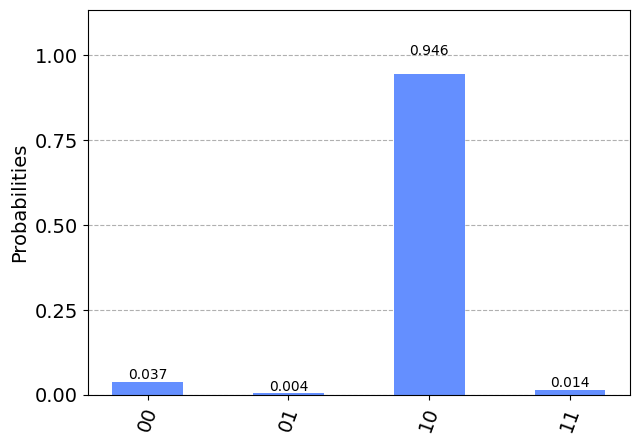

In [323]:
#create_bell_pair
def create_bell_pair():
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc
def encode_message(qc, qubit, msg):
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

qc = create_bell_pair()


qc.barrier()



message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()

qc = decode_message(qc)

qc.measure_all()

qc.draw()
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(qc))

{'10': 1024}


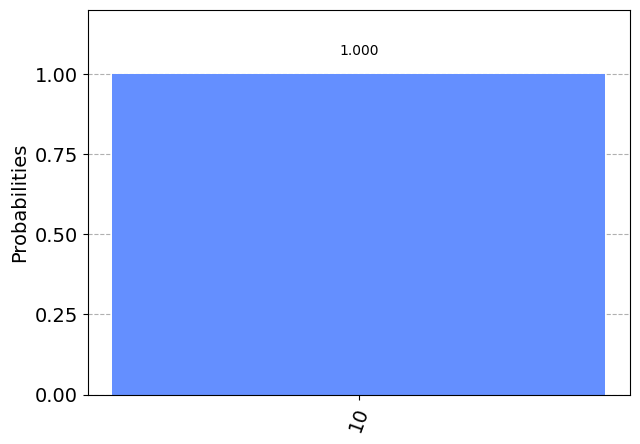

In [65]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

### Question 2.a

In [10]:
#quantum teleportation
phi = np.random.random()
theta = np.random.random()
lamda = np.random.random()

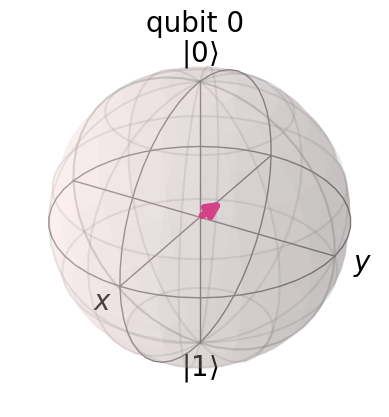

In [160]:
#check original alice qubit state
qc_alice = QuantumCircuit(1)
qc_alice.u(phi,theta,lamda,0)
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc_alice, simulator)
result = job.result()
statevector2 = result.get_statevector()
plot_bloch_multivector(statevector2)

In [161]:
print(statevector2)

Statevector([0.8897368+0.j        , 0.3439123+0.30015453j],
            dims=(2,))


In [158]:
qc = QuantumCircuit(3,1)
qc.u(phi,theta,lamda,0)
qc.h(2)
qc.cnot(2,1)
qc.cnot(0,1)
qc.h(0)
qc.measure(1,0)
qc.x(2).c_if(0, 1)
qc.measure(0,0)
qc.z(2).c_if(0, 1)
qc.draw()

┌────────────────────────────┐          ┌───┐           ┌─┐           
q_0: ┤ U(0.94806,0.71756,0.91755) ├───────■──┤ H ├───────────┤M├───────────
     └────────────────────────────┘┌───┐┌─┴─┐└┬─┬┘           └╥┘           
q_1: ──────────────────────────────┤ X ├┤ X ├─┤M├─────────────╫────────────
                 ┌───┐             └─┬─┘└───┘ └╥┘    ┌───┐    ║    ┌───┐   
q_2: ────────────┤ H ├───────────────■─────────╫─────┤ X ├────╫────┤ Z ├───
                 └───┘                         ║     └─╥─┘    ║    └─╥─┘   
                                               ║  ┌────╨────┐ ║ ┌────╨────┐
c: 1/══════════════════════════════════════════╩══╡ c_0=0x1 ╞═╩═╡ c_0=0x1 ╞
                                               0  └─────────┘ 0 └─────────┘

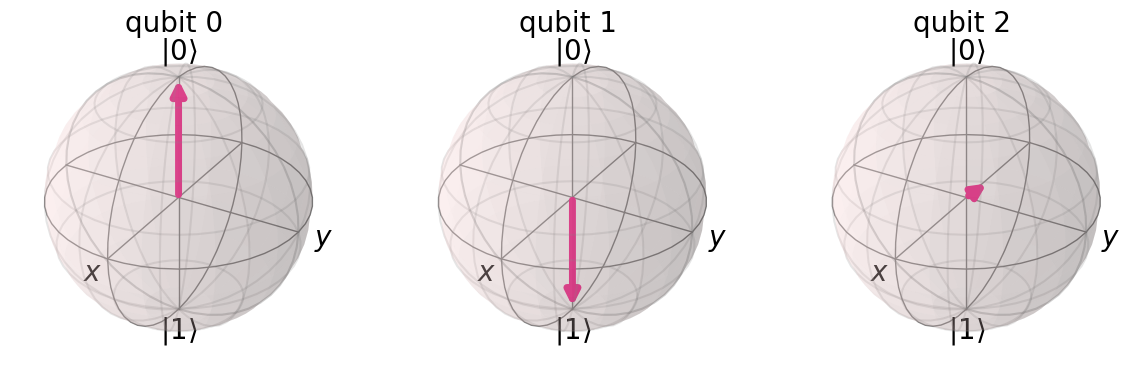

In [159]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector23 = result.get_statevector()
plot_bloch_multivector(statevector23)

In [162]:
print(statevector23)

Statevector([0.       +0.j        , 0.       +0.j        ,
             0.8897368+0.j        , 0.       +0.j        ,
             0.       +0.j        , 0.       +0.j        ,
             0.3439123+0.30015453j, 0.       -0.j        ],
            dims=(2, 2, 2))


In [178]:
state_bob = []
state_bob.append(statevector23[2])
state_bob.append(statevector23[6])
print(statevector2,state_bob)
print(np.round(np.vdot(statevector2,state_bob)))

Statevector([0.8897368+0.j        , 0.3439123+0.30015453j],
            dims=(2,)) [(0.8897368048675541+0j), (0.3439123049652567+0.3001545344611005j)]
(1-0j)


In [166]:
#validation solution 2_inverse operation
qc.u(-phi,-theta,-lamda,2)
qc.measure(2,0)
qc.draw()
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 6, '0': 1018}


In [321]:
#validation solution 3_swap test
qc = QuantumCircuit(5,1)
qc.u(phi,theta,lamda,0)
qc.i(0)
qc.u(phi,theta,lamda,1)
qc.h(3)
qc.cnot(3,2)
qc.cnot(1,2)
qc.h(1)
qc.measure(2,0)
qc.x(3).c_if(0, 1)
qc.measure(1,0)
qc.z(3).c_if(0, 1)
#qc.draw()

qc.h(4)
qc.cswap(4,3,0)
qc.h(4)
qc.x(4)
qc.measure(4,0)
qc.draw()


┌────────────────────────────┐┌───┐                                      »
q_0: ┤ U(0.94806,0.71756,0.91755) ├┤ I ├────────────────────────────────────X─»
     ├────────────────────────────┤└───┘     ┌───┐           ┌─┐            │ »
q_1: ┤ U(0.94806,0.71756,0.91755) ├───────■──┤ H ├───────────┤M├────────────┼─»
     └────────────────────────────┘┌───┐┌─┴─┐└┬─┬┘           └╥┘            │ »
q_2: ──────────────────────────────┤ X ├┤ X ├─┤M├─────────────╫─────────────┼─»
                 ┌───┐             └─┬─┘└───┘ └╥┘    ┌───┐    ║    ┌───┐    │ »
q_3: ────────────┤ H ├───────────────■─────────╫─────┤ X ├────╫────┤ Z ├────X─»
                 ├───┤                         ║     └─╥─┘    ║    └─╥─┘    │ »
q_4: ────────────┤ H ├─────────────────────────╫───────╫──────╫──────╫──────■─»
                 └───┘                         ║  ┌────╨────┐ ║ ┌────╨────┐   »
c: 1/══════════════════════════════════════════╩══╡ c_0=0x1 ╞═╩═╡ c_0=0x1 ╞═══»
                                               0  └─────────┘ 0 └─────────┘   »
«                  
«q_0: ─────────────
«                  
«q_1: ─────────────
«                  
«q_2: ─────────────
«                  
«q_3: ─────────────
«     ┌───┐┌───┐┌─┐
«q_4: ┤ H ├┤ X ├┤M├
«     └───┘└───┘└╥┘
«c: 1/═══════════╩═
«                0

In [322]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 1024}


### Question 2.b

In [199]:
qc2b = QuantumCircuit(4,1)
qc2b.u(2*phi,3*theta,lamda,0)
qc2b.h(0)
qc2b.cnot(0,1)


qc2b.h(3)
qc2b.cnot(3,2)
qc2b.cnot(1,2)
qc2b.h(1)
qc2b.measure(2,0)
qc2b.x(3).c_if(0, 1)
qc2b.measure(1,0)
qc2b.z(3).c_if(0, 1)
qc2b.draw()

┌──────────────────────────┐┌───┐                                        
q_0: ┤ U(1.8961,2.1527,0.91755) ├┤ H ├──■─────────────────────────────────────
     └──────────────────────────┘└───┘┌─┴─┐     ┌───┐           ┌─┐           
q_1: ─────────────────────────────────┤ X ├──■──┤ H ├───────────┤M├───────────
                                 ┌───┐└───┘┌─┴─┐└┬─┬┘           └╥┘           
q_2: ────────────────────────────┤ X ├─────┤ X ├─┤M├─────────────╫────────────
                ┌───┐            └─┬─┘     └───┘ └╥┘    ┌───┐    ║    ┌───┐   
q_3: ───────────┤ H ├──────────────■──────────────╫─────┤ X ├────╫────┤ Z ├───
                └───┘                             ║     └─╥─┘    ║    └─╥─┘   
                                                  ║  ┌────╨────┐ ║ ┌────╨────┐
c: 1/═════════════════════════════════════════════╩══╡ c_0=0x1 ╞═╩═╡ c_0=0x1 ╞
                                                  0  └─────────┘ 0 └─────────┘

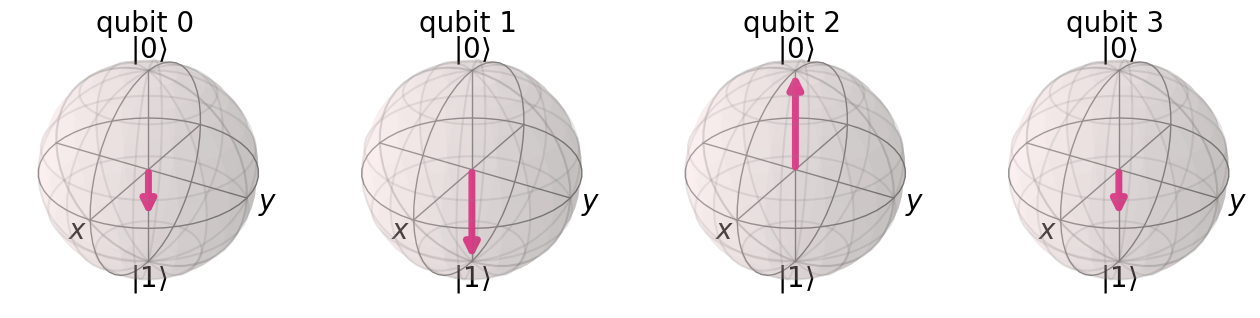

In [200]:
#check result
#qc2b.measure_all()
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc2b, simulator)
result = job.result()
statevector23 = result.get_statevector()
plot_bloch_multivector(statevector23)

### Question 3.a

In [310]:
n = 1000; # number of qubits used in the BB84 
noise3 = np.random.randint(100)
np.random.seed(seed=90+noise3)
## Step 1
# Alice generates bits
alice_bits = np.random.randint(2, size=n) 
print(alice_bits)
print("Alice's first bit = %i" % alice_bits[0])

[0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0
 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 1 1 1 0 1 1 1 0 1 

In [313]:
def encode_msg(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in X-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in Z-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [314]:
## Step 2
# Create an array to tell us which qubits are encoded in which bases 
alice_bases = np.random.randint(2, size=n)
message = encode_msg(alice_bits, alice_bases) 
print(alice_bases)
print("Alice's first chosen basis = %i" % alice_bases[0])

[1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0
 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1
 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0
 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1
 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 1 1 0 

In [300]:
def measure_message(message, bases):
    backend = Aer.get_backend('qasm_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
            message[q].h(0) # preparing the post-measurement state
        result = execute(message[q], backend, shots=1, memory=True).result() 
        measured_bit = int(result.get_memory()[0]) 
        measurements.append(measured_bit)
    return measurements

In [301]:
## Step 3
# Decide which basis to measure in:
bob_bases = np.random.randint(2, size=n)
bob_results = measure_message(message, bob_bases)
print(bob_bases)
print(bob_results)
print("Bob's first chosen basis = %i" % bob_bases[0])

[1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0]
[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
Bob's first chosen basis = 1


In [302]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

In [303]:
## Step 4
# Remove bits where Alice's chosen bases are not equal to that of Bob's 
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results) 
print(alice_key)
print(bob_key)

[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]


In [304]:
def intercept_message(message, bases):
    backend = Aer.get_backend('qasm_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
            message[q].h(0) # preparing the post-measurement state
        result = execute(message[q], backend, shots=1, memory=True).result() 
        measured_bit = int(result.get_memory()[0]) 
        measurements.append(measured_bit)
    return measurements

In [305]:
## Interception!!
eve_bases = np.random.randint(2, size=n)
intercepted_message = intercept_message(message, eve_bases)
print(eve_bases)
print("Eve's first chosen basis = %i" % alice_bases[0]) 
print(intercepted_message)
print("Eve's first intercepted message = %i" % intercepted_message[0])


[0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0]
Eve's first chosen basis = 0
[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]
Eve's first intercepted message = 1


In [306]:
#3a
#print(alice_bases)
#print(bob_bases)
#print(eve_bases)
#print("-----")
#print(alice_bits)
#print(bob_results)
#print(intercepted_message)
def calculate(inter_mes,orig_mes):
    ans = 0
    for i in range(len(inter_mes)):
        if inter_mes[i] == orig_mes[i]:
            ans+=1
    return ans/len(inter_mes)
correct_rate = calculate(intercepted_message,alice_bits)
print(correct_rate)

0.68


### Question 3.b

In [315]:
def Breidbart_measure(message):
    backend = Aer.get_backend('qasm_simulator')
    measurements = []
    for q in range(len(message)):
        message[q].ry(-math.pi/4,0)
        message[q].measure(0,0)
        message[q].ry(math.pi/4,0) # preparing the post-measurement state
        result = execute(message[q], backend, shots=1, memory=True).result() 
        measured_bit = int(result.get_memory()[0]) 
        measurements.append(measured_bit)
    return measurements

In [316]:
## Interception!!
eve_bases = np.random.randint(2, size=n)
B_intercepted_message = Breidbart_measure(message)
#print(eve_bases)
#print("Eve's first chosen basis = %i" % alice_bases[0]) 
print(B_intercepted_message)
print("Eve's first B_intercepted message = %i" % B_intercepted_message[0])
correct_rate = calculate(B_intercepted_message,alice_bits)
print(correct_rate)

[1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 